<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Recommender Systems

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain common recommendation techniques:
    - Popularity
    - Collaborative filtering
- Understand types of data used for recommendation, and their tradeoffs:
    - Explicit
    - Implicit
- Implement a user-based recommendation engine.



### Lesson Guide
- [What exactly is a recommender system?](#intro)
- [Types of Recommendation Systems](#Types)
- [Recommending What's Popular](#popular)
- [Recommending Based on Content](#content-based-filtering)
- [User-Based Collaborative Filtering](#user)
- [Item-Based Collaborative Filtering](#item)
- [Evaluating Recommendations](#evaluate)
- [Lab: User-Based Collaborative Filtering with Movie Data](#lab)

<a id='intro'></a>
# What exactly is a recommender system?

* How do they work and what do they seek to accomplish?  
* What kind of data do we need to bake a recommender?

**Question:** What are real life examples of recommender systems?
    
**Answer:** Pandora, Tinder, Amazon, etc.

**Question:** What kind of data is needed to make recommendations?

**Answer:** User Behavior, Ratings, Item Meta-data (features), User Preferences

## More Specific Examples of Data
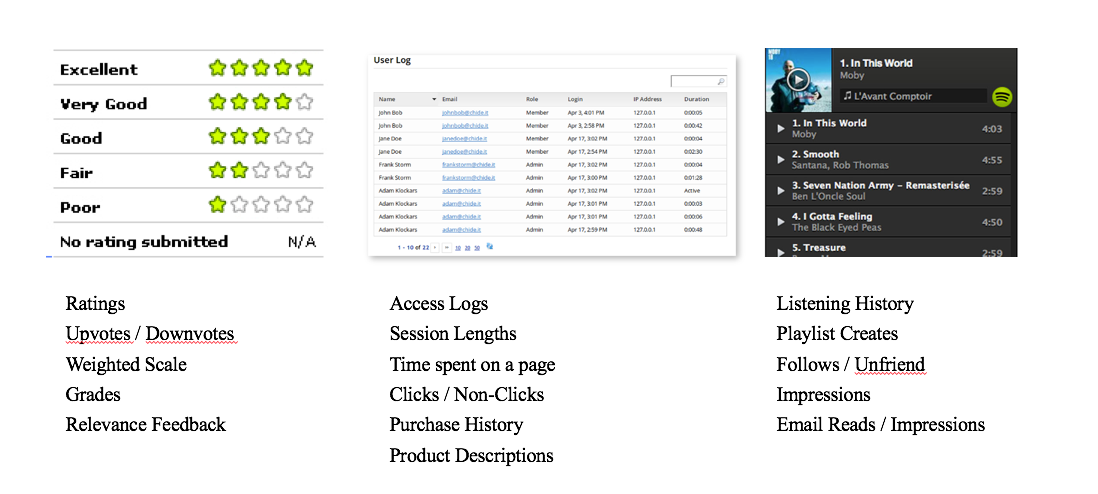

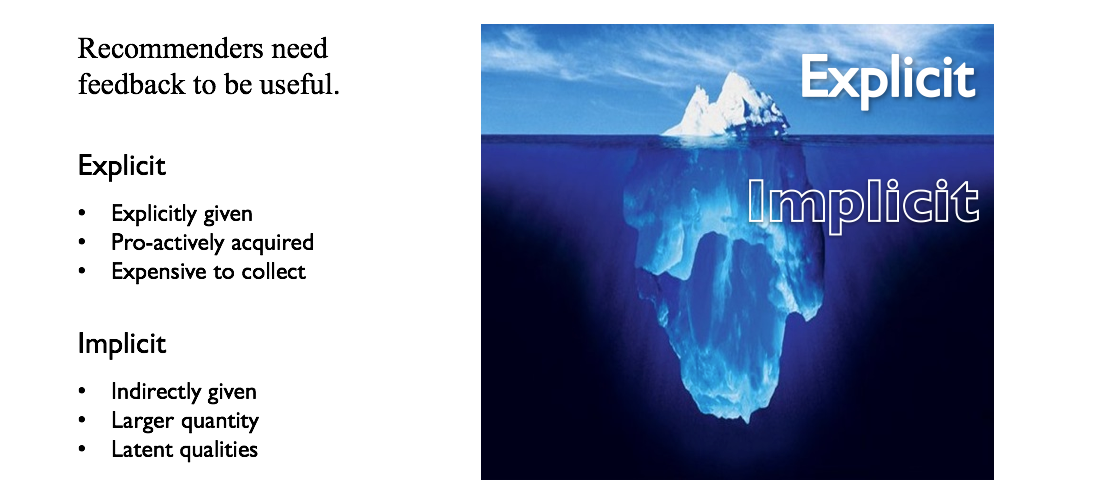

**Production grade recommendation systems are usually a mix of 4 or more methods that can adapt to a prefered modality, based on available data, or business objectives.**

---

**Question.** Which of the following are explict feedback? Which are implicit feedback? Could any be both?

1. Product reviews (1 to 5 stars) on Amazon.com.
2. Swipe left or right to indicate a "like" or "dislike" on Tinder.
3. Playing a song on Spotify.
4. Logging in to a Wifi network at Target.

In [ ]:
# A:

#### Summary

Explicit feedback

- Higher value with respect to preferences
- Usually collected as a "rating"
- Collection is responsibility of user
- More direct evaluation of items

Implicit feedback
- Easy to collect in large quantities
- More difficult to work with
- Assumes nothing about the user (could be anyone!)
- Goal is to convert into preferences

<a id='Types'></a>
# Types of Recommendation Systems

## Collaborative Filtering

Collaborative filtering works by collecting user data, both explicit and implicit, and exploiting similarities. The approach is based on assumption that people choose new items which similar to other things they like. If someone shares similar tastes to the user then those items are presented to them to see the outcome. The real outcome is to represent the behavior in how similar groups make choices.  

<img src='./images/Collab-similarities.png' alt='Collaborative similarities' width='500'>


<div style="text-align: right"><a href="https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0">Source</a></div>


## Typical Collaborative Filtering Flow

<img src='./images/collab_model.png' alt='Collaborative model flow'>

<div style="text-align: right"><a href="https://towardsdatascience.com/the-difference-between-model-and-memory-based-recommenders-4bc83507902">Source</a></div>

The above is a typical workflow for a Collaborative filtering recommendation system. To make a recommendation you need to begin with SOME data. Most models need a certain number of events before they start being effective. The period of providing a good recommendation with limited data is called the "Early Rater problem". To solve it the model tends to start with a reduction phase

- **Reduction** - filters out individuals with less than n observations. These are typically provided top purchases as recommendations
- **Interaction matrix** - Captures the interactions of individuals with items
- **Similarity** - Matches similar users to find 
- **Prediction** - Serves up most likely list of products for each individual
- **Evaluation** - Measures how well the system works over time with REAL records. This data can be used to reinforce the model through new learnings/observations through traditional, reinforcement learning or memory based Neural Networks


<img src='./images/Collab_Filter_Type.png' alt='Collaborative Filter Types' >




<div style="text-align: right"><a href="https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0#:~:text=In%20memory%2Dbased%20algorithms%2C%20we,Pearson%20correlation%20or%20cosine%20similarity.">Source</a></div>

### Popular model based libraries
- [Surprise](https://surprise.readthedocs.io/en/stable/index.html) - easy-to-use Python scikit for recommender systems
- [FastAi](https://github.com/fastai/fastai) -fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains


- [Basic implementation walkthroughs for both](https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0#:~:text=In%20memory%2Dbased%20algorithms%2C%20we,Pearson%20correlation%20or%20cosine%20similarity.)


## Content based filtering

Content based filtering systems flips the script and focuses not on similar behavior but on similar items. It looks at user preferences for items and recommend similar items based on a domain-specific notion of item content. This approach also extends naturally to cases where item metadata is available (e.g., movie stars, book authors, and music genres).

<img src='./images/Simpsons.png' alt='Collaborative similarities' width='500'>

<div style="text-align: right"><a href="https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0">Source</a></div>

<img src='./images/Content_model.png' alt='Content model flow'>

<div style="text-align: right"><a href="https://towardsdatascience.com/the-difference-between-model-and-memory-based-recommenders-4bc83507902">Source</a></div>

Similarly to the CF flow the content model uses a reduction layer to limit observations to a population with an appropriate number of events.

- **Interaction** - A matrix tracking how content is interacted with by users
- **Features** - Matrix holding meta-data for each individual item
- **Model** - Looks at the connections between interactions and features to make recommendations

## Collaborative vs Content


Let's look at the different ways these systems work

<img src='./images/Combined2.jpeg' alt='Collaborative & content again' >


### In action

**On the Left**

- The user on the top has similar choices to a person on the bottom. 
- The algorithm links them with similar behaviors
- Being linked - it offers **oranges & grapes** as recommendations 

**On the right**
- The algorithm sees grapes and watermelons are chosen with similar patterns
- Since the bottom user chose a watermelon then grapes are recommended

<img src='./images/Combined.png' alt='Collaborative & Content' >





<div style="text-align: right"><a href="https://heartbeat.fritz.ai/recommender-systems-with-python-part-ii-collaborative-filtering-k-nearest-neighbors-algorithm-c8dcd5fd89b2">Source</a></div>

## Question: Which would be a better approach? Think of a few use cases and post them in the chat

Track your answers in the below box:

In [ ]:
#Answers & thoughts?















## Hybrid approach

There's often an advantage of combining content and collaborative based filtering. A hybrid approach will require profiles on both users and items.  Usually it constructs and then compare user-profile and item-profile using the content of shared attribute space. For example, for a movie, you represent it with the movie stars in it and the genres (using a binary coding for example).

For user profile, you can do the same thing based on the users likes some movie stars/genres etc

<img src='./images/hybrid_model.png' alt='Hybrid Workflow' >





<div style="text-align: right"><a href="https://towardsdatascience.com/the-difference-between-model-and-memory-based-recommenders-4bc83507902">Source</a></div>

## Other systems

### 1. Social and Demographic 

These systems suggest items that are liked by friends, friends of friends, and demographically-similar people. Such recommenders don’t need any preferences by the user to whom recommendations are made, making them very powerful.
    
### 2. Contextual

Recommend items that match the user’s current context. This allows them to be more flexible and adaptive to current user needs than methods that ignore context (essentially giving the same weight to all of the user’s history). Hence, contextual algorithms are more likely to elicit a response than approaches that are based only on historical data.
    
**Example** - Geospacial based recommendations such as Twitter advertisements try to be contextual. The system include
- User profile: This guy loves McDonalds....
- Time features: Are you more likely to be hungry right now?
- Weather data: How hot is it outside?
- Geospatial cues: Have you stopped at a place that serves food for a period of time today?
        
**Result** If those point in the right direction **BUT** you're passing McDonalds left and right then they'll serve you an ad. 

### "Hey guy - looks like you could use a Mcflurry right now. Buy an extra value meal and it's on us!"

What type of system are we seeing in the below?

<center><img src='https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif' alt='recommender systems' width='550'></center>

<div style="text-align: right"><a href="https://en.wikipedia.org/wiki/Collaborative_filtering">Source</a></div>

<a id='popular'></a>
# Recommending What's Popular
A common, and simple approach is to recommend what's popular.

Pros:
- Intuitive
- Fast Computation
- Good for "Cold Start Problem" (i.e. user has no behavior history)

Cons:
- Not Tailored
- Many people get the same recommendations.

In [68]:
import pandas as pd

# From the MovieLens dataset
movies = pd.read_csv('./data/movies.csv')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [4]:
# Create list of tuples containing the movie title and the count of ratings
pop_movies = movies.groupby('title')['rating'].count().sort_values(ascending=False)
pop_movies = list(zip(pop_movies.index, pop_movies))
pop_movies

[('Star Wars (1977)', 583),
 ('Contact (1997)', 509),
 ('Fargo (1996)', 508),
 ('Return of the Jedi (1983)', 507),
 ('Liar Liar (1997)', 485),
 ('English Patient, The (1996)', 481),
 ('Scream (1996)', 478),
 ('Toy Story (1995)', 452),
 ('Air Force One (1997)', 431),
 ('Independence Day (ID4) (1996)', 429),
 ('Raiders of the Lost Ark (1981)', 420),
 ('Godfather, The (1972)', 413),
 ('Pulp Fiction (1994)', 394),
 ('Twelve Monkeys (1995)', 392),
 ('Silence of the Lambs, The (1991)', 390),
 ('Jerry Maguire (1996)', 384),
 ('Chasing Amy (1997)', 379),
 ('Rock, The (1996)', 378),
 ('Empire Strikes Back, The (1980)', 367),
 ('Star Trek: First Contact (1996)', 365),
 ('Back to the Future (1985)', 350),
 ('Titanic (1997)', 350),
 ('Mission: Impossible (1996)', 344),
 ('Fugitive, The (1993)', 336),
 ('Indiana Jones and the Last Crusade (1989)', 331),
 ('Willy Wonka and the Chocolate Factory (1971)', 326),
 ('Princess Bride, The (1987)', 324),
 ('Forrest Gump (1994)', 321),
 ('Monty Python and th

In [5]:
# Create list of user id and the movies they have rated
user = movies.copy()[['user_id','title']]
user_movie = user.groupby('user_id')['title'].apply(list)
user_movie

user_id
1      [Toy Story (1995), GoldenEye (1995), Four Room...
2      [Toy Story (1995), Richard III (1995), Mighty ...
3      [Return of the Jedi (1983), Devil's Own, The (...
4      [Seven (Se7en) (1995), Star Wars (1977), India...
5      [Toy Story (1995), GoldenEye (1995), From Dusk...
                             ...                        
939    [Dead Man Walking (1995), Mr. Holland's Opus (...
940    [Get Shorty (1995), Twelve Monkeys (1995), Bab...
941    [Toy Story (1995), Twelve Monkeys (1995), Mr. ...
942    [Crimson Tide (1995), Star Wars (1977), Lion K...
943    [GoldenEye (1995), Dead Man Walking (1995), Se...
Name: title, Length: 943, dtype: object

In [6]:
# Create function that loops through the list of movies and checks if a user has rated that movie
def new_movie_rec(movies, max_results=5):
    new_suggestions = [(movies,frequency)
                   for movies, frequency in pop_movies
                    if movies not in pop_movies]
    return new_suggestions[:max_results]

In [7]:
# For user ID 5, we will view the top 10 movies they have not seen
new_movie_rec(user_movie[5],10)

[('Star Wars (1977)', 583),
 ('Contact (1997)', 509),
 ('Fargo (1996)', 508),
 ('Return of the Jedi (1983)', 507),
 ('Liar Liar (1997)', 485),
 ('English Patient, The (1996)', 481),
 ('Scream (1996)', 478),
 ('Toy Story (1995)', 452),
 ('Air Force One (1997)', 431),
 ('Independence Day (ID4) (1996)', 429)]

The intuition is to recommend the top movies that a user has not yet seen.

---

**Question: What issues could you see with this approach?**

In [ ]:
# A: 

<a id="content-based-filtering"></a>
## Recommending Based on Content (i.e. Content-based Filtering)

In content-based filtering, the items are broken down into "feature baskets". These are the characteristics that represent the item. The idea is that if you like the features of song X, then finding a song that has similar characteristics will tell us that you're likely to like it as well.


The quintessential example of this is Pandora with it's musical genome. Each song is rated on ~450 characteristics by a trained musicologist.

<a id="example"></a>
## Example 
Content-based filtering begins by mapping each item into
a feature space. Both users and items are represented by
vectors in this space.
Item vectors measure the degree to which the item is
described by each feature, and user vectors measure a
user’s preferences for each feature.
Ratings are generated by taking dot products of user &
item vectors. 

<img src="images/contentbased.png" width="600">

Note this is essentially linear regression!

In fact, this technique is identical to the classifiers we have studied so far in this class.

Using supervised learning, we find what characteristics indicate each movie. Then we predict the probability that a new user might like a movie.

---

For the rest of this lesson, we will be focusing on techniques that are **independent** of content. By only looking at which users enjoy which items, the techniques can be applied to any items at all.

<a id='user'></a>
# User-Based Collaborative Filtering

Perhaps a more intuitive recommendation than the popularity method (though that can be better in certain cases), is to take into account a user's interests. 

To do this, we can look at matrix of users, find similar users, and recommend items those similar users like.

Pros:
- Customized to user
- Easy to implement
- Intuitive

Cons:
- Most similar user may not be very similar. (Many items purchased by "similar" users that the user did not purchase affect the recommendation.)
- Scalability.  More users=more computation time.
- Cold start. New users without information.
- New items. New items will not be recommended.

## Dot Product Review

By now this should be a familiar idea:

# $\vec A\cdot\vec B=A_xB_x+A_yB_y$

Here are a few examples in 2D, with the cooresponding angle, $\theta$, between the two vectors.

<img src="images/dotproducts.png" width="200">

Note: 

+ $\cos{0^\circ} = 1.0$
+ $\cos{60^\circ} = 0.5$
+ $\cos{90^\circ} = 0.0$
+ $\cos{150^\circ} = -\sqrt{3}/2 \approx -0.866$

## Distance Metrics: Cosine Similarity

There are many distance metrics we can use to measure similarity between items or users.  One similarity metric we will use a bit in this lesson will be cosine similarity.

Here, similarity is measured as the angle between two vectors -- a smaller angle indicates more similar:

![](images/cosinesimilarity.png)

## $$
cos(\theta) = \frac{A \cdot B}{\left\| A\right\| \left\| B\right\| } = \frac{A \cdot B}{\sqrt{\sum{A_i^2}} \cdot \sqrt{\sum{B_i^2}}}
$$


<img src="./images/dotproducts.png" width="200">

### Literal Example

$$
\vec{A} = \begin{bmatrix}
3 \ 2 \ \text{-}5
\end{bmatrix} \\
\vec{B} = \begin{bmatrix}
5 \ 3 \ \text{-}2
\end{bmatrix}
\\
$$

**Let's calculate the numerator:**

$$
\vec{A} \cdot \vec{B} = \\
\begin{bmatrix}
3 \\ 2 \\ \text{-}5
\end{bmatrix} 
\cdot 
\begin{bmatrix}
5 \\ 3 \\ \text{-}2
\end{bmatrix}
= (3\times5) + (2\times3) + (-5\times-2) = 31
$$

<br>

**Now let's calculate the denominator:**

$$
\left\| A\right\|\left\| B\right\| = 
\sqrt{3^2 + 2^2 + \text{-}5^2}\times\sqrt{5^2 + 3^2 + \text{-}2^2} = 38
$$

<br>


> Result is approximate due to rounding decimal.  Check our Python example below for floating precicse cosine similarity.

**Cosine Similarity**

$$
cos(\theta) = \frac{31}{38} \approx .816
$$

Note this is in radians!

In [8]:
# Here, we create a cosine similarity function using numpy
import numpy as np

## Cosine Function
def cosine_sim(A, B):
    adotb = np.dot(A, B)
    magscale = np.sqrt(np.dot(A, A)) * np.sqrt(np.dot(B, B))
    return adotb / magscale

A = np.array([3,2,-5])
B = np.array([5,3,-2])

cosine_sim(A, B)

0.8157894736842107

In [9]:
# Hence, the angle between the two vectors is arccos(0.816).

# Angle between vectors in degrees (there are 2pi rads per 360 degrees)
np.arccos(31/38) * (360 / (2 * np.pi))

35.33450179182306

#### sklearn cosine reference

In [10]:
# Also available is the pre-coded cosine_similarity metric from sklearn
from sklearn.metrics.pairwise import cosine_similarity

# Gives the cosine similarity between all pairs of vectors passed in
cosine_similarity([A, B])

array([[1.        , 0.81578947],
       [0.81578947, 1.        ]])

### Similarity on familiar data
Since we've been working with text recently, here's a basic example of applying cosine similarity to text data.


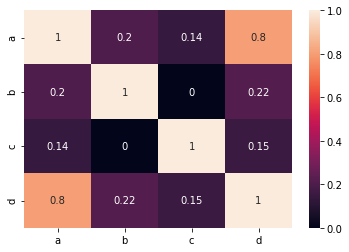

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd, numpy as np, seaborn as sns


sentences = [
    ("a", "Matt and Riley hang 10 at the beach"),
    ("b", "Matt rides a skateboard"),
    ("c", "Skateboards are super cool, like Riley"),
    ("d", "Matt and Riley teach at the beach")
]

df = pd.DataFrame(sentences, columns=["sample", "sentence"])
df = df.set_index("sample")

# Setup vectorizer...
vect = CountVectorizer(stop_words=None)
X = vect.fit_transform(df['sentence']).toarray()

df = pd.DataFrame(X, columns=vect.get_feature_names(), index=df.index)

# Similarity of sentence "d" to all sentences
cosine_sent = cosine_similarity(df, df)
sns.heatmap(cosine_sent, annot=True,  xticklabels=['a','b','c','d'], yticklabels=['a','b','c','d']);

#Here we can see that sentence "d" is most similar to sentence "a" with a cosine similarity of 0.8

## Distance Metrics: Jaccard Similarity

Other distance metrics also work well on text data. For some, the data does not even have to be vectorized!

Suppose we have two sets of brands, e.g. user1 = {'Target', 'Starbucks', 'Gap'} and user2 = {'Starbucks', 'Old Navy'}. Then, the Jaccard similarity between the users is:

$$Jaccard(u1, u2) = \frac{\text{# brands in common}}{\text{# brands in total}}$$

Here, the users have one brand ('Starbucks') in common. In total, there are four brands -- 'Target', 'Starbucks', 'Gap', and 'Old Navy'. So, the Jaccard similarity is $\frac{1}{4} = 0.25$.

---

Using set notation, the Jaccard similarity between sets $A$ and $B$ is:

$$Jaccard(A, B) = \frac{A \cap B}{A \cup B}$$

+ $A \cap B$: Intersection (distinct elements in A and B)
+ $A \cup B$: Union (distinct elements in A or B)

---

**Exercise.** Similar to above, can you create a heatmap of Jaccard similarities for the same set of sentences? First, write a Jaccard function. Then, create the heatmap!

In [16]:
# Remember that set objects have union and intersection methods!

def jaccard_similarity(set1, set2):
    """ Return the Jaccard similarity between set1 and set2."""
    
    return 0.0

# Test
jaccard_similarity({'Target', 'Starbucks', 'Gap'}, {'Starbucks', 'Old Navy'})  # should be 0.25

0.0

[{'10', 'beach', 'the', 'matt', 'at', 'and', 'hang', 'riley'}, {'matt', 'a', 'rides', 'skateboard'}, {'skateboards', 'are', 'super', 'cool', 'like', 'riley'}, {'beach', 'teach', 'the', 'matt', 'at', 'and', 'riley'}]


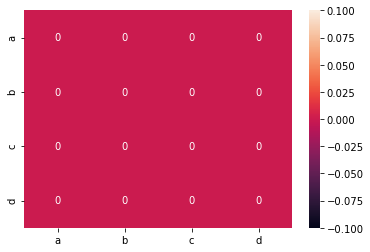

In [17]:
# Note: This code should not be modified.

sentences = [
    ("a", "Matt and Riley hang 10 at the beach"),
    ("b", "Matt rides a skateboard"),
    ("c", "Skateboards are super cool, like Riley"),
    ("d", "Matt and Riley teach at the beach")
]

sentence_words = [set(sentence.replace(',', '').lower().split()) for label,sentence in sentences]
print(sentence_words)

jaccard_sent = [[jaccard_similarity(a, b) for b in sentence_words] for a in sentence_words]

sns.heatmap(jaccard_sent, annot=True, xticklabels=['a','b','c','d'], yticklabels=['a','b','c','d']);

## Common User-Item Collaborative Filtering:  Binary Preferences

In this example, we will look at several users and the movies they have seen:

Common coding systems:
- 1=watched, 0=not watched
- On a 5 point-scale: 1=rating>=3, 0=rating<3

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt, seaborn as sns

from IPython.display import display

%matplotlib inline

In [19]:
# Create the simulated dataframe
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

# setup dataframe
users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


### User Similarity

In [20]:
# Build similarity matrix
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, columns = users.index, index = users.index)

users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.0,0.500000,0.000000,0.000000
Nancy,0.5,1.000000,0.408248,0.408248
Divya,0.0,0.408248,1.000000,0.666667
Pat,0.0,0.408248,0.666667,1.000000


**Question:** What conclusions could you make about this output?  Whom is most similar to whom?

In [40]:
#A: 

### We can now query user similarities
Here we are viewing who is most similar to Nancy:

In [21]:
users_sim.query("user == 'Nancy'").T.sort_values("Nancy", ascending=False)

user,Nancy
user,
Nancy,1.000000
Chuck,0.500000
Divya,0.408248
Pat,0.408248


In [22]:
# Build quick function to look at users similiarity
top_n_users = lambda user: users_sim.query("user == '%s'" % user).T.sort_values(user, ascending=False)

display("Top Similar Users", top_n_users("Chuck"))
display("Common Movies", users.T[users.query("index == 'Chuck'").any(0)])

# We can see that Chuck and Nancy share Friday the 13th in common

'Top Similar Users'

user,Chuck
user,
Chuck,1.0
Nancy,0.5
Divya,0.0
Pat,0.0


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Friday the 13th,1,1,0,0
Nightmare on Elm St,1,0,0,0


In [16]:
# Let's check out Nancy's information
display("Top Similar Users", top_n_users("Nancy"))
display("Common Movies", users.T[users.query("index == 'Nancy'").any(0)])

'Top Similar Users'

user,Nancy
user,
Nancy,1.000000
Chuck,0.500000
Divya,0.408248
Pat,0.408248


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Friday the 13th,1,1,0,0
180 South,0,1,1,1


In [17]:
# Investigate Pat
display("Top Similar Users", top_n_users("Pat"))
display("Common Movies", users.T[users.query("index == 'Pat'").any(0)])


'Top Similar Users'

user,Pat
user,
Pat,1.000000
Divya,0.666667
Nancy,0.408248
Chuck,0.000000


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Dawn of the Dead,0,0,0,1
180 South,0,1,1,1
Exit Through the Giftshop,0,0,1,1


## Which movies should we recommend to whom?

In [18]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


In [19]:
# View users Similarity
users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.0,0.500000,0.000000,0.000000
Nancy,0.5,1.000000,0.408248,0.408248
Divya,0.0,0.408248,1.000000,0.666667
Pat,0.0,0.408248,0.666667,1.000000


### We'll add a few movies and make _Pat_ watch them.
In effect, expanding the number of movies that other users haven't seen.

![](images/patmovies.png)

**Question.** However, what might this do to our user similarity space?  What will happen?  Will Divya and Pat still be friends after!? (poll + thread)  

In [41]:
# A: 

In [23]:
# The 4th user is Pat
users['This is Justin Bieber']        =  [0, 0, 0, 1]
users['Nanook of the North']          =  [0, 0, 0, 1] 
users['Sharknado: Directors Cut']     =  [0, 0, 0, 1] 
users['Snowpiercer: The Musical']     =  [0, 0, 0, 1]
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,This is Justin Bieber,Nanook of the North,Sharknado: Directors Cut,Snowpiercer: The Musical
user,,,,,,,,,,
Chuck,1,1,0,0,0,0,0,0,0,0
Nancy,1,0,0,0,1,0,0,0,0,0
Divya,0,0,0,1,1,1,0,0,0,0
Pat,0,0,1,0,1,1,1,1,1,1


In [24]:
users_sim = pd.DataFrame(cosine_similarity(users, users), columns=users.index, index=users.index)

![](images/pat_cosine.png)

In [25]:
# Display "Divya", after
display("Top Similar Users", top_n_users("Divya"))
display("Common Movies", users.T[users.query("index == 'Divya'").any(0)])

'Top Similar Users'

user,Divya
user,
Divya,1.000000
Pat,0.436436
Nancy,0.408248
Chuck,0.000000


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Hiro Dreams of Sushi,0,0,1,0
180 South,0,1,1,1
Exit Through the Giftshop,0,0,1,1


## Let's recommend some movies to Divya using this approach.
> Not using anything other than common sense, knowing that Pat and Divya are somewhat similar, which movies should Divya watch?  Also consider what Nancy has liked.

We could scale the original preference matrix of 0's and 1's by the values from any vector in the user similarity matrix, then aggregate these projected scores by column to learn which movies are good to recommend based on user similarity. **We are going to code a very basic version of this idea now!**

![](images/add_a_movie.png)

In [26]:
# Scale the user ratings (transpose) by the user similarity vector
ratings = users.T * users_sim['Divya']
ratings.mean(axis=1).sort_values(ascending=False)

180 South                    0.461171
Exit Through the Giftshop    0.359109
Hiro Dreams of Sushi         0.250000
Snowpiercer: The Musical     0.109109
Sharknado: Directors Cut     0.109109
Nanook of the North          0.109109
This is Justin Bieber        0.109109
Dawn of the Dead             0.109109
Friday the 13th              0.102062
Nightmare on Elm St          0.000000
dtype: float64

To recommend movies that Divya hasn't seen yet, we can remove the movies she has seen / rated.

In [27]:
ratings = users.T * users_sim['Divya']
ratings[ratings['Divya'] == 0].mean(axis=1).sort_values(ascending=False)

Snowpiercer: The Musical    0.109109
Sharknado: Directors Cut    0.109109
Nanook of the North         0.109109
This is Justin Bieber       0.109109
Dawn of the Dead            0.109109
Friday the 13th             0.102062
Nightmare on Elm St         0.000000
dtype: float64

<a id='item'></a>
# Item-Based Collaborative Filtering

Another approach is to find the similarity between items consumers have purchased and aggregate those similarities to make recommendations.

"People who like this item also liked these items."

**Item-based filtering is the most commonly used approach on major websites.**

Pros:
- Easy to implement
- Intuitive


Cons:
- High computation cost
- High dimensionality

---

Amazon pioneered item-based filtering on its early websites. Their requirements were:

1. Handle huge amounts of data (10M+ customers, 5M+ items).
2. Results returned in real-time.
3. New customers start with limited information.
4. Older customers have lots of information.
5. New customer data requires instantly new recommendations.

(From: "Amazon.com Recommendations: Item-to-Item Collaborative Filtering")

---

Lets begin by rebuilding our user-item matrix.

In [28]:
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


In [29]:
# Transpose data to make the items the rows and the users the columns
items = users.T
items

user,Chuck,Nancy,Divya,Pat
Friday the 13th,1,1,0,0
Nightmare on Elm St,1,0,0,0
Dawn of the Dead,0,0,0,1
Hiro Dreams of Sushi,0,0,1,0
180 South,0,1,1,1
Exit Through the Giftshop,0,0,1,1


### The Item Similarity Matrix

This matrix shows us similarity of items based on how users have rated them.  The quality if these relationships is as good as the data you have.  It's also a great point of investigation to see if similar items end up generally together.

Potential non-recommendation tasks on this type of data include:
- Dimensionality reduction
- Unsupervised clustering

In [30]:
item_user_sim = pd.DataFrame( 
    cosine_similarity(items, items), 
    index   = items.index, 
    columns = items.index 
)

item_user_sim

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
Friday the 13th,1.000000,0.707107,0.000000,0.000000,0.408248,0.000000
Nightmare on Elm St,0.707107,1.000000,0.000000,0.000000,0.000000,0.000000
Dawn of the Dead,0.000000,0.000000,1.000000,0.000000,0.577350,0.707107
Hiro Dreams of Sushi,0.000000,0.000000,0.000000,1.000000,0.577350,0.707107
180 South,0.408248,0.000000,0.577350,0.577350,1.000000,0.816497
Exit Through the Giftshop,0.000000,0.000000,0.707107,0.707107,0.816497,1.000000


**Question:** What conclusions can you make from this output?

In [42]:
# A:

In [31]:
# Calculate similarities to Friday the 13th
top_n_items = lambda title: item_user_sim.query("index == '%s'" % title).T.sort_values(title, ascending=False)
display("Top Similar Titles (based on user sim)", top_n_items("Friday the 13th"))
display("Common Users", items.T[items.query("index == 'Friday the 13th'").any(0)])

'Top Similar Titles (based on user sim)'

,Friday the 13th
Friday the 13th,1.000000
Nightmare on Elm St,0.707107
180 South,0.408248
Dawn of the Dead,0.000000
Hiro Dreams of Sushi,0.000000
Exit Through the Giftshop,0.000000


'Common Users'

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0



This is good and all, but this method is still very "basic".  While powerful as collaborative filtering provides a realiable basis for providing recommendations, it's limited by computational complexity.  As the size of our element features and users grow, so does the cost of calculating the pairwise utility matrix.  At some point we might need to reduce the problem so it's faster to compute.  We can reduce this problem considerably using a decomposition method such as [SVD](https://www.youtube.com/watch?v=R9UoFyqJca8).  Adding SVD allows to generalize to a lower dimensional space, without sacrificing our ability to provide good results.  

SVD, is similar to PCA, and similarly it will find eigenvalues ranked by some order.

## $SVD = U\Sigma V^T$

A great video that also explains the idea of "concepts" in terms of SVD elements as it applies to recommender systems (item to item using user ratings), is [Lecture 47 — Singular Value Decomposition | Stanford University](https://www.youtube.com/watch?v=P5mlg91as1c).

Here is a template you can use for providing item-to-item collaborative filtering based recommendations with TruncatedSVD provided by sklearn.

### Demo: Movie Data

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load the data
movies = pd.read_csv('./data/movies.csv')

# Fill NaN with 0
user_ratings = movies.pivot_table(values="rating", index="user_id", columns="title").fillna(0)

# Scale the ratings (anything greater than the mean ie: 0 == preferable movie rating)
scaler  = StandardScaler()
user_ratings_scaled = scaler.fit_transform(user_ratings)

# Update the user_ratings matrix as the standard scaled version of itself
user_ratings = pd.DataFrame(user_ratings_scaled, columns=user_ratings.columns)
user_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,-0.090953,-0.064693,1.666105,2.957423,-0.198530,-0.315871,2.873897,1.571944,-0.073010,-0.252454,...,-0.032582,-0.076269,-0.032582,2.500179,2.571026,-0.207604,-0.199697,-0.073895,11.311979,-0.032582
1,-0.090953,-0.064693,-0.336619,-0.384919,-0.198530,-0.315871,-0.281033,-0.588906,13.696715,-0.252454,...,-0.032582,-0.076269,-0.032582,-0.502456,-0.332540,-0.207604,-0.199697,-0.073895,-0.093737,-0.032582
2,-0.090953,-0.064693,-0.336619,-0.384919,2.821046,-0.315871,-0.281033,-0.588906,-0.073010,-0.252454,...,-0.032582,-0.076269,-0.032582,-0.502456,-0.332540,-0.207604,-0.199697,-0.073895,-0.093737,-0.032582
3,-0.090953,-0.064693,-0.336619,-0.384919,-0.198530,-0.315871,-0.281033,-0.588906,-0.073010,-0.252454,...,-0.032582,-0.076269,-0.032582,-0.502456,-0.332540,-0.207604,-0.199697,-0.073895,-0.093737,-0.032582
4,-0.090953,-0.064693,1.666105,-0.384919,-0.198530,-0.315871,-0.281033,1.571944,-0.073010,-0.252454,...,-0.032582,-0.076269,-0.032582,1.899652,-0.332540,-0.207604,-0.199697,-0.073895,11.311979,-0.032582


#### Decompose to 12 components with SVD
Roughly based on movie genres but a longer inspection process can be useful to understand similar subsets of decomposed ratings to titles.

In [33]:
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd_ratings = svd.fit_transform(user_ratings.fillna(0).T)
svd_ratings.shape

(1664, 12)

#### Decompose to our utility matrix, from our SVD ratings matrix

In [34]:
U = pairwise_distances(svd_ratings, svd_ratings, metric="cosine")

We can select the index cooresponding to the exact index for '101 Dalmations (1996)', `target_movie`, look up it's vectors in the pairwise cosine distance matrix (ie: utility matrix U) that we will later merge with our titles matching the indices of the utility matrix.

In [35]:
target_movie = user_ratings.columns.tolist().index("101 Dalmatians (1996)")
movie_sim = U[target_movie]

#### Now we attach the indices to the original ratings dataframe containing the titles to sort / display our recommendations based on "distance" (ie: difference).

We should see similar comedies centered around the 80s but this is based on latent characteristics of our original user preferences so they are still approximate.

> Similarity can be interpreted as $similarity\ =\ 1\ /\ (distance\ +\ 1)$.  A subtle difference but it does mean we add an extra complexity to our problem so this is why distance is preferable.  Distance is more efficient to calculate on it's own.

In [36]:
recs = pd.DataFrame(
    list(
        zip(user_ratings.columns.tolist(), movie_sim)
    ), 
    columns=["movie", "distance"]
)
recs.sort_values("distance").head(15)

,movie,distance
2,101 Dalmatians (1996),0.000000
693,Homeward Bound II: Lost in San Francisco (1996),0.030859
23,"Adventures of Pinocchio, The (1996)",0.049107
764,Jack (1996),0.050587
46,All Dogs Go to Heaven 2 (1996),0.054888
713,"Hunchback of Notre Dame, The (1996)",0.063983
505,Father of the Bride Part II (1995),0.069567
532,Flipper (1996),0.085762
1171,"Preacher's Wife, The (1996)",0.088995
1552,Two if by Sea (1996),0.111200


**Question:** What conclusion can you make about 101 Dalmations from the output above?

In [43]:
# A: 

Now we will take it one step further and create recommendations for users, based on the average of the distance of all movies from the movies they have watched.

In [37]:
# Create dataframe of all user ratings and their Utility values as a list
movie_dist = pd.DataFrame(
    list(
        zip(user_ratings.columns.tolist(), U)
    ), 
    columns=["title", "distance"]
)

In [38]:
# All users and the titles they have rated
user=movies.copy()[['user_id','title']]

In [39]:
# Combine the dataframe of users, the movies they rated, and the distance to all movies.
user_movie=user.merge(movie_dist, how='inner', on='title')
user_movie.head()
# Notice the distance to all movies is in a list, which we need to explode out to a dataframe

,user_id,title,distance
0,308,Toy Story (1995),"[0.7463021586903072, 1.1129447502034424, 0.188..."
1,287,Toy Story (1995),"[0.7463021586903072, 1.1129447502034424, 0.188..."
2,148,Toy Story (1995),"[0.7463021586903072, 1.1129447502034424, 0.188..."
3,280,Toy Story (1995),"[0.7463021586903072, 1.1129447502034424, 0.188..."
4,66,Toy Story (1995),"[0.7463021586903072, 1.1129447502034424, 0.188..."


In [40]:
# Explode the distances out so each one is a row
s = user_movie.apply(lambda x: pd.Series(x['distance']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'distance'
user_movie= user_movie.drop('distance', axis=1).join(s)

In [41]:
# Assign a key, so we can join to the movie list
user_movie['key'] = user_movie.groupby(['user_id','title']).cumcount()+1
user_movie.head()

,user_id,title,distance,key
0,308,Toy Story (1995),0.746302,1
0,308,Toy Story (1995),1.112945,2
0,308,Toy Story (1995),0.188814,3
0,308,Toy Story (1995),0.630408,4
0,308,Toy Story (1995),1.178246,5


In [42]:
# Create a list of distinct movies and also create a key to join to the user-distance dataframe
movie_list=pd.DataFrame(user_ratings.columns.tolist())
movie_list.rename(columns={0:'title'},inplace=True)
movie_list['key']=movie_list.index +1
movie_list.head()

,title,key
0,'Til There Was You (1997),1
1,1-900 (1994),2
2,101 Dalmatians (1996),3
3,12 Angry Men (1957),4
4,187 (1997),5


In [43]:
#Merge with user title distance dataframe
user_movie_ratings=user_movie.merge(movie_list, how='inner',on='key')

In [44]:
# Calculate the average distance of all movies to the movies that a user watched
user_recs=user_movie_ratings.groupby(by=['user_id','title_y'],as_index=False)[['distance']].mean().\
sort_values(by=['user_id','distance'], ascending=True)
user_recs.head()

,user_id,title_y,distance
591,1,Get Shorty (1995),0.332222
319,1,Clueless (1995),0.343401
1317,1,"Shawshank Redemption, The (1994)",0.356057
739,1,In the Line of Fire (1993),0.356602
1565,1,Unforgiven (1992),0.357878


In [45]:
# View the top 5 recommendations for user 5
user_recs[user_recs['user_id']==5].head()

,user_id,title_y,distance
8005,5,Sneakers (1992),0.284858
7606,5,"Mask, The (1994)",0.291691
7395,5,In the Line of Fire (1993),0.292984
6968,5,Clear and Present Danger (1994),0.298042
6692,5,Aladdin (1992),0.299783


In [46]:
# These are the movies this user watched.
movies[movies['user_id']==5].head(10)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
820,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,5,4,875635748,33,F,other,15213
821,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,5,3,875636053,33,F,other,15213
822,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,5,4,875636198,33,F,other,15213
823,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,5,3,875635327,33,F,other,15213
824,24,Rumble in the Bronx (1995),23-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Hong%20Faan%2...,5,4,879198229,33,F,other,15213
825,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",5,3,875635318,33,F,other,15213
826,29,Batman Forever (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Batman%20Fore...,5,4,875637023,33,F,other,15213
827,40,"To Wong Foo, Thanks for Everything! Julie Newm...",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?To%20Wong%20F...,5,4,879198109,33,F,other,15213
828,42,Clerks (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Clerks%20(1994),5,5,875636360,33,F,other,15213
829,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,5,4,875635758,33,F,other,15213


**Question:** Do the recommendations seem reasonable based on the movies the user watched? How does this compare to the popular recommendations? 

In [44]:
# A: 

Try other users as well.

<a id='evaluate'></a>
# Evaluating Recommendations

Recommendation isn't always straight forward when it comes to measuring performance.  Recommenders can be a very vague affair to measure but the main aspects that are considered:

- **Offline**
 - Looking at past data through **train** and **test** validation
- **Online**
 - Tuned for real-world applications
 - A/B Testing / Focus groups

## Offline Evaluation

This is a very common practice but is limited to data that has been collected.  For doing basic recommendation, it's a good benchmark but rarely is the task of recommendation in the real world so cut and dry.  However, this method may not be a good prediction about what will happen in the future.

### "Hit" Ratios

We _can_ use classification metrics to evaluate recommendation performance, but it's largely due to the application object we're concerned about.  

These are not as "ground truth" as is typical with classfication problems because there is a bit of subjectivity to how you can determine what is good or bad with recommendation.  With supervised learning, it's very cut and dry in the sense that you know what $y$ is supposed to be and you can compare the error directly with $\hat{y}$ and evaluate precisely.

With recommendation, one common technique is called **hit** rate which isn't exactly ** $y$ **, but a range of $N$ to measure successful recommendations against a holdout set.

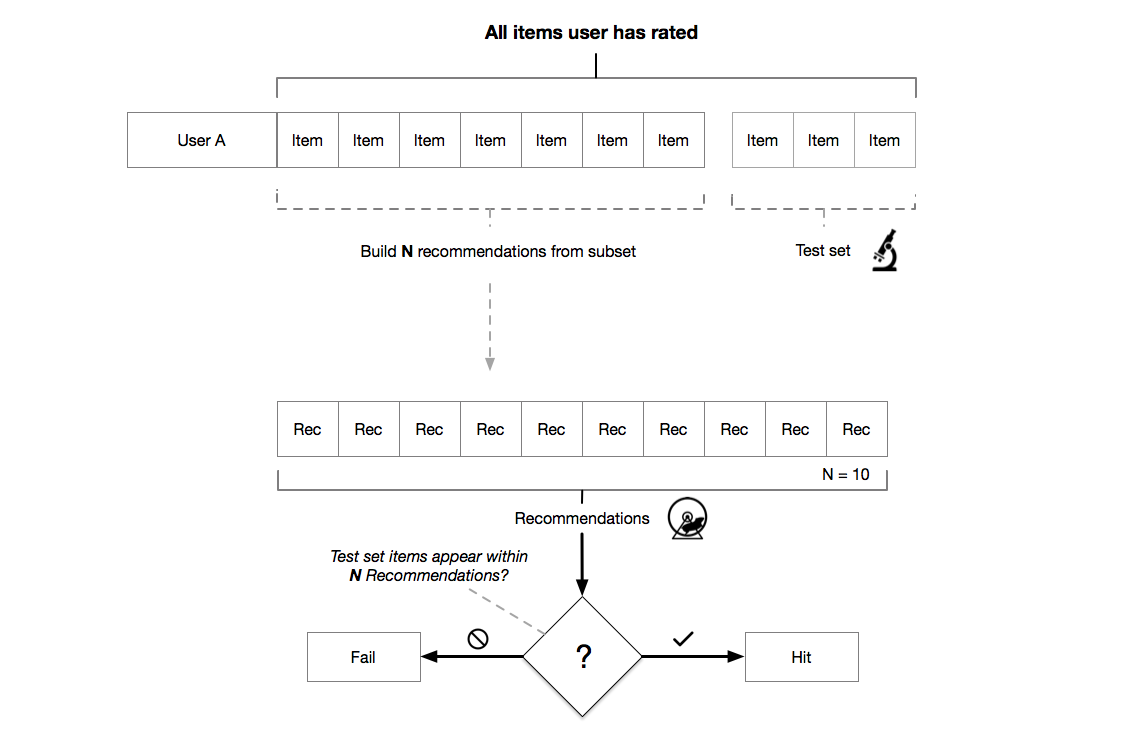

_Given a users total items they have rated, leave out the last item(s), then see if it (or they) show up in the users recommendation set within $N$ recommendations.  $N$ can be any number, but generally, as $N$ increases, the more likely you will be to get a **hit**_.  In the real world, you might tune this to be similar to average click path per user, or some other implicit indicator of engagement.  For instance, you might care more about the recommendations a user first sees in a mobile app or website, rather than other places burried deeper on your website or app so you might be more critical of $N$ in the case in the former case and more lax in the latter.

If we wanted to calculate the global hit rate, not just user:

# $\text{Global Hit Rate} = \frac{\text{successful hits}}{\text{number of users}}$


> <img src="images/hit_ratios.png" style="float: left; width: 25px; margin-right: 5px;"> Do you think this is fair for smaller neighborhoods in collaborive filtering (ie: Users who haven't rated many items)?


## Using Classification metrics

Precision and recall can also be used to evaluate your recommendations.  Two way to translate a successful positive case (ie: recommendation was good and recommended):

- Rating correctly predicted (confirmed by test set) within some threashold of rating (TP) - Rating Based
- Recommendation appears within **N** (TP) - Ranking Based



#### Precision
1. $\frac{\text{correctly recommended items}}{\text{all recommended items}}$

#### Recall
1. $\frac{\text{correctly recommended items}}{\text{correctly recommended items} + \text{incorrectly recommended items}}$

Recall deserves a little explanation in the context of recommendation.  We calculate Recall by:

# $Recall = \frac{TP}{TP + FN}$

$TP$ = Correctly recommended items<br>
$FN$ = We incorrectly recommended something undesirable

In this scenario, recall drops as we recommend bad items as good items.  This is largely important when ranking is being evaluated.

> Sometimes this called "precision-at-**N**" or "recall-at-**N**"

### Conclusion: Basic Collaborative Filtering
- **Similar** users reduce projected ratings **less**
- **Dissimilar** users reduce projected ratings **more**
- Form of matrix factorization or matrix decomposition
- User similarity is used to reduce the ratings matrix
- There are many forms
  - User to item (Movies recommended for you)
  - User to user (People that watch the same moves as you)
  - Item to item (People who like Snowpiercer also like ...)



<a id='lab'></a>
# Lab: User-Based Collaborative Filtering with Movie Data

The objective is to recommend movies to a user based on the ratings of similar users.  In this case, we will use the actual ratings, instead of a binary flag.

#### 1. Transpose the table to create a user-item matrix

In [48]:
user_movie_rating = movies.pivot_table(index='user_id', columns='title', values='rating')  
user_movie_rating.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#### 2. Fill NaN with 0.  Find the Pandas Method that will fill NAs with 0.

#### 3. Create and print the similarity matrix between users.

#### 4. What are the top 5 users most similar to User_id=5?

#### 5. Scale the user ratings (transpose) by the user similarity vector

#### 6. Which movies would you recommend to user 5 that they have not seen?

In [74]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


## Bonus: AWS reinforcement learning example: 
https://github.com/awslabs/amazon-sagemaker-examples/blob/master/reinforcement_learning/bandits_recsys_movielens_testbed/bandits_movielens_testbed.ipynb